# World Population Analysis

This notebook explores global population trends using the provided dataset. 
It includes:
- Analyses of population growth across countries and continents.
- Population density comparisons.
- Growth rate trends.

Visualizations will help illustrate key patterns and insights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("world_population_data.csv")
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


## Dataset Overview

This section list the dataset columns,


In [3]:
pd.Series(df.columns)

0                 rank
1                 cca3
2              country
3            continent
4      2023 population
5      2022 population
6      2020 population
7      2015 population
8      2010 population
9      2000 population
10     1990 population
11     1980 population
12     1970 population
13          area (km²)
14       density (km²)
15         growth rate
16    world percentage
dtype: object

In [4]:
df.isna().sum()


rank                0
cca3                0
country             0
continent           0
2023 population     0
2022 population     0
2020 population     0
2015 population     0
2010 population     0
2000 population     0
1990 population     0
1980 population     0
1970 population     0
area (km²)          0
density (km²)       0
growth rate         0
world percentage    0
dtype: int64

In [5]:
df.duplicated().sum()

0

## Population Growth Trends

Examine how populations have changed over time for the top 10 most populous countries.


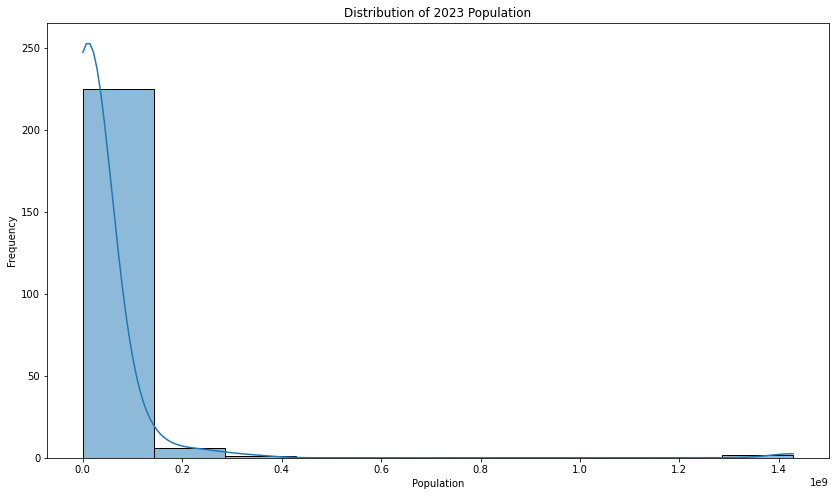

In [6]:
plt.figure(figsize=(14, 8))
sns.histplot(df['2023 population'], bins=10, kde=True)

plt.title('Distribution of 2023 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.show()

In [7]:
highest_population = df.groupby('continent')['2023 population'].sum().reset_index()
# highest_population.sort_values(by='2023 population', ascending=False)
highest_population.sort_values(by='2023 population', ascending=False).reset_index(drop=True)

,continent,2023 population
0,Asia,4751819588
1,Africa,1460476458
2,Europe,741869197
3,North America,604155369
4,South America,439719009
5,Oceania,45575769


In [8]:
# top 10 countries by population in 2023
top_countries = df.sort_values(by='2023 population', ascending=False).reset_index(drop=True)
top_ten_countries = top_countries[['2023 population', 'country']].head(10)

top_ten_countries

,2023 population,country
0,1428627663,India
1,1425671352,China
2,339996563,United States
3,277534122,Indonesia
4,240485658,Pakistan
5,223804632,Nigeria
6,216422446,Brazil
7,172954319,Bangladesh
8,144444359,Russia
9,128455567,Mexico


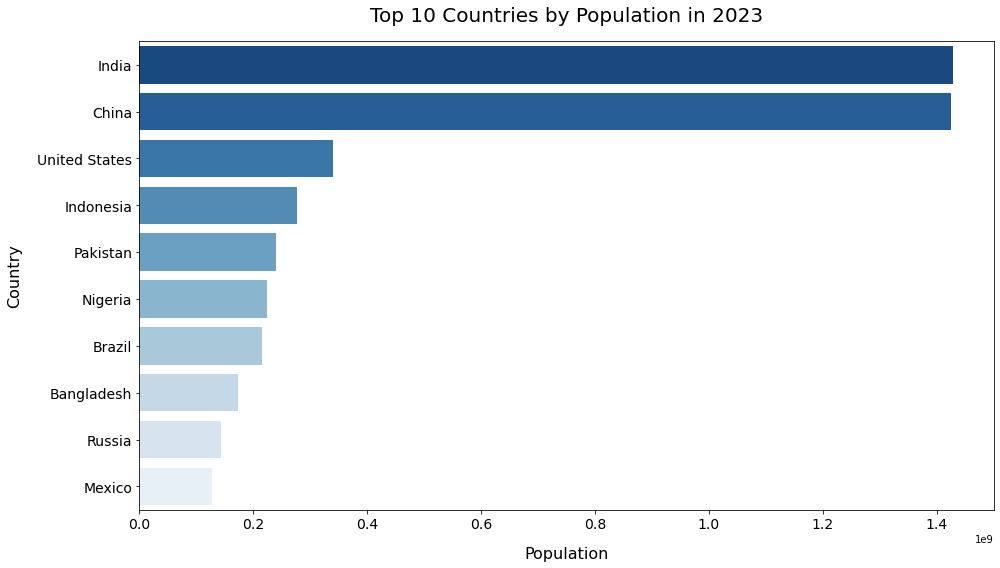

In [9]:
# top_ten_countries = top_ten_countries.head(10)

# Plot the data using Seaborn
plt.figure(figsize=(14, 8))  # Set figure size
sns.barplot(
    x='2023 population', 
    y='country', 
    data=top_ten_countries, 
    palette='Blues_r'  # Custom color palette
)

# Add title and labels
plt.title('Top 10 Countries by Population in 2023', fontsize=20, pad=20)
plt.xlabel('Population', fontsize=16, labelpad=15)
plt.ylabel('Country', fontsize=16, labelpad=15)

# Format the ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ensure layout is tight and display the plot
plt.tight_layout()
plt.show()

## Population vs. Density

This scatter plot below visualizes the relationship between a country's population size and its population density. 




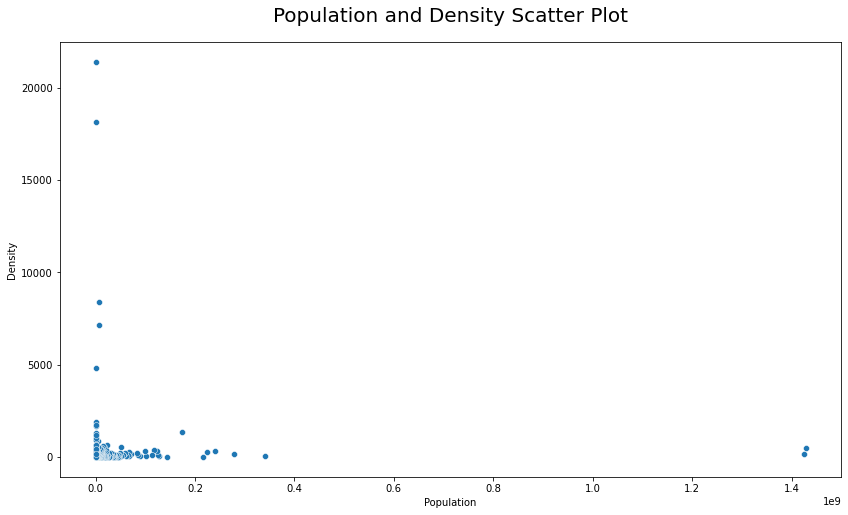

In [10]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = '2023 population', y="density (km²)", data=df)
plt.title('Population and Density Scatter Plot', fontsize=20, pad=20)
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()

Key observations from the plot above:
- Larger populations do not always correspond to higher densities (e.g., large countries with vast land areas often have lower densities).
- Countries with high population densities tend to be smaller in area but densely packed (e.g., city-states or island nations).
The plot can help identify patterns in urbanization, land use, and population distribution.

In [11]:
df.groupby("continent")["area (km²)"].sum().sort_values(ascending=False)

continent
Asia             32138143.90
Africa           30317963.00
North America    24244178.00
Europe           23010411.26
South America    17833382.00
Oceania           8515218.00
Name: area (km²), dtype: float64

## Population Density Across Continents

This violin plot illustrates the distribution of population densities across different continents. 

Key points to observe:
- The width of the plot at each level indicates the density distribution's concentration for that continent.
- Continents with high variability in density (e.g., Asia) show a wider spread, indicating the presence of both highly dense countries (e.g., city-states) and sparsely populated ones (e.g., large landmass countries).
- Comparatively narrower plots suggest more uniform densities within the continent.

This visualization provides insights into how population density varies within and across continents, offering clues about regional land use and urbanization trends.


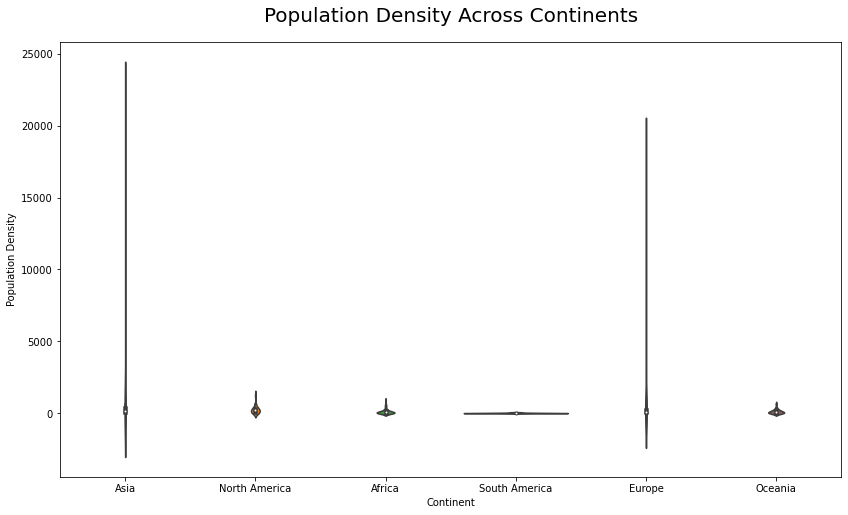

In [12]:
plt.figure(figsize=(14, 8))
sns.violinplot(x = 'continent', y="density (km²)", data=df, pallet="viridis")
plt.title('Population Density Across Continents', fontsize=20, pad=20)
plt.xlabel('Continent')
plt.ylabel('Population Density')
plt.show()

## Conclusion

Key takeaways from the analysis:
1. India surpassed China in population by 2023, with over 1.43 billion people.
2. Asia hosts the majority of the world’s population, followed by Africa and Europe.
3. Countries with high population densities, such as small island nations, exhibit unique growth dynamics.
4. Some continents show rapid growth rates, while others are stabilizing or declining.

These insights can guide policies on urbanization, resource allocation, and sustainable development.
